In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
ver_python = !python --version
ver_numpy = np.__version__
ver_pandas = pd.__version__

In [129]:
print(f'Python: Version {ver_python} \nNumpy: Version {ver_numpy} \nPandas: Version {ver_numpy}')

Python: Version ['Python 3.9.19'] 
Numpy: Version 1.26.4 
Pandas: Version 1.26.4


In [130]:
df = pd.read_csv('./dataset/car_evaluation.csv')
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_capacity  1728 non-null   object
 5   safety        1728 non-null   object
 6   output        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [132]:
df.describe()

,price,maint,doors,persons,lug_capacity,safety,output
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [133]:
df.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [134]:
'''
| price        | 가격
| maint        | 유지비 maintenance costs 
| doors        | 문 개수
| persons      | 탑승 가능 인원
| lug_capacity | 수화물 적재 용량 luggage capacity
| safety       | 안정성
| output       | 차 상태
'''

'\n| price        | 가격\n| maint        | 유지비 maintenance costs \n| doors        | 문 개수\n| persons      | 탑승 가능 인원\n| lug_capacity | 수화물 적재 용량 luggage capacity\n| safety       | 안정성\n| output       | 차 상태\n'

In [135]:
# missing value 확인
df.isnull().sum()

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

In [136]:
pd.unique(df['output'])

# unacceptable, acceptable, verygood, good

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

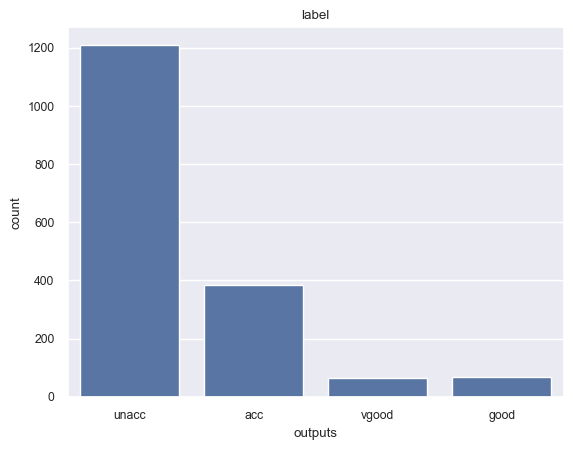

In [137]:
# label count 확인 by graph
sns.countplot(data=df, x='output')
plt.xlabel('outputs')
plt.ylabel('count')
plt.title('label')
plt.show()

In [138]:
# label count 확인 by numeric
df['output'].value_counts()

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [139]:
# correlation 확인 <- dtype이 object일 때는 불가능 함
df_corr = df.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

ValueError: could not convert string to float: 'vhigh'

In [150]:
for feature in df.columns[:-1]: # 마지막 column인 'output'은 제외
    # 각 feature의 unique 출력
    print(f'{feature}({df[feature].dtype}): {pd.unique(df[feature])}')

# 6개의 features 모두 nominal type이다.
# cf. category가 2개만 있을 때는 binary type이라고 한다

price(object): ['vhigh' 'high' 'med' 'low']
maint(object): ['vhigh' 'high' 'med' 'low']
doors(object): ['2' '3' '4' '5more']
persons(object): ['2' '4' 'more']
lug_capacity(object): ['small' 'med' 'big']
safety(object): ['low' 'med' 'high']


In [151]:
# features의 dtype을 'object' -> 'category'로 변경
for category in df.columns[:-1]:
    # 긱 column의 dtype을 'category'로 변경
    df[category] = df[category].astype(dtype='category',
                                      copy=None,
                                      errors='raise')
    # df[category].cat.categories로 mapping 확인 가능
    print(df[category].cat.categories)


# 변경 결과 확인
for feature in df.columns[:-1]:
    print(f'{feature}({df[feature].dtype}): {pd.unique(df[feature])}')

Index(['high', 'low', 'med', 'vhigh'], dtype='object')
Index(['high', 'low', 'med', 'vhigh'], dtype='object')
Index(['2', '3', '4', '5more'], dtype='object')
Index(['2', '4', 'more'], dtype='object')
Index(['big', 'med', 'small'], dtype='object')
Index(['high', 'low', 'med'], dtype='object')
price(category): ['vhigh', 'high', 'med', 'low']
Categories (4, object): ['high', 'low', 'med', 'vhigh']
maint(category): ['vhigh', 'high', 'med', 'low']
Categories (4, object): ['high', 'low', 'med', 'vhigh']
doors(category): ['2', '3', '4', '5more']
Categories (4, object): ['2', '3', '4', '5more']
persons(category): ['2', '4', 'more']
Categories (3, object): ['2', '4', 'more']
lug_capacity(category): ['small', 'med', 'big']
Categories (3, object): ['big', 'med', 'small']
safety(category): ['low', 'med', 'high']
Categories (3, object): ['high', 'low', 'med']


In [152]:
df.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [153]:
# 'category' dtype을 numerical하게 변경
# 'category' dtype인 경우에만 사용 가능함
# 변경 후에는 모두 numerical하게 표현되어 인간이 인식하기 헷갈릴 수 있음
for numerical_category in df.columns[:-1]:
    df[numerical_category] = df[numerical_category].cat.codes

# 변경 결과 확인
for feature in df.columns[:-1]:
    print(f'{feature}({df[feature].dtype}): {pd.unique(df[feature])}')
    
print(df.head())

price(int8): [3 0 2 1]
maint(int8): [3 0 2 1]
doors(int8): [0 1 2 3]
persons(int8): [0 1 2]
lug_capacity(int8): [2 1 0]
safety(int8): [1 2 0]
   price  maint  doors  persons  lug_capacity  safety output
0      3      3      0        0             2       1  unacc
1      3      3      0        0             2       2  unacc
2      3      3      0        0             2       0  unacc
3      3      3      0        0             1       1  unacc
4      3      3      0        0             1       2  unacc


In [154]:
df['output'] = df['output'].astype(dtype='category',
                                      copy=None,
                                      errors='raise')

In [155]:
# mapping 확인
print(df['output'].cat.categories) # 출력 순서대로 0 1 2 3에 mapping

Index(['acc', 'good', 'unacc', 'vgood'], dtype='object')


In [156]:
df['output'] = df['output'].cat.codes

print(f"ouput({df['output'].dtype}): {pd.unique(df['output'])}")
    
print(df.head())

ouput(int8): [2 0 3 1]
   price  maint  doors  persons  lug_capacity  safety  output
0      3      3      0        0             2       1       2
1      3      3      0        0             2       2       2
2      3      3      0        0             2       0       2
3      3      3      0        0             1       1       2
4      3      3      0        0             1       2       2


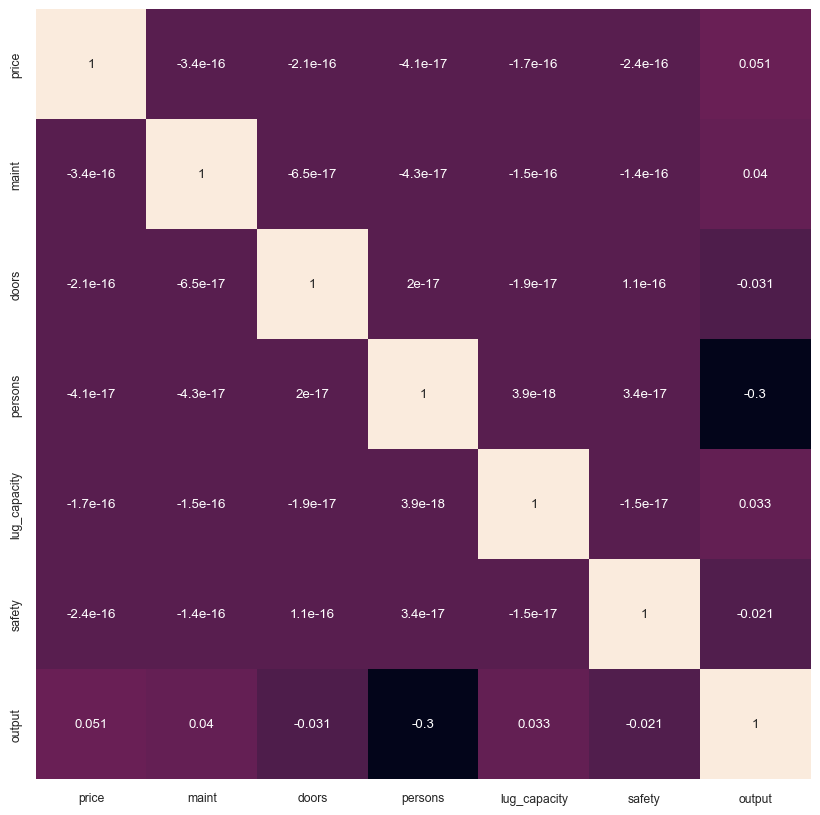

In [157]:
# 모두 numeric으로 바꿨기 때문에 corr 가능
df_corr = df.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [158]:
# convert dataframe to numpy
X = df.drop('output', axis=1).to_numpy()
y = pd.get_dummies(df['output']).to_numpy() # one-hot encoding도 추가로 함
print(X[:3])
print(y[:3])

# 일반적으로 one-hot encoding은 binary를 사용하지만,
# 특정 상황이나 설정에 따라 Boolean으로 표현될 수 있음.

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]]
[[False False  True False]
 [False False  True False]
 [False False  True False]]


In [159]:
# import Pytorch and set device as cuda(gpu)
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [160]:
# convert numpy to tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
print(X_tensor[:3])
print(y_tensor[:3])
print(f'X_tensor SIZE: {X_tensor.shape} y_tensor SIZE: {y_tensor.shape}')

tensor([[3., 3., 0., 0., 2., 1.],
        [3., 3., 0., 0., 2., 2.],
        [3., 3., 0., 0., 2., 0.]])
tensor([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])
X_tensor SIZE: torch.Size([1728, 6]) y_tensor SIZE: torch.Size([1728, 4])


In [161]:
# split dataset(tensor) into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2,
                                                    stratify=y_tensor,
                                                    random_state=42)
print(X_train.shape, X_test.shape)

torch.Size([1382, 6]) torch.Size([346, 6])


In [162]:
# acc / good / unacc / vgood
# 위에서 one-hot encoding할 때 sort된다. 숫자-알파벳 순
print('y_train의 각 class 개수', torch.sum(y_train, axis=0))
print('y_test의 각 class 개수', torch.sum(y_test, axis=0))

y_train의 각 class 개수 tensor([307.,  55., 968.,  52.])
y_test의 각 class 개수 tensor([ 77.,  14., 242.,  13.])


In [163]:
# Define the model
import torch.nn as nn


class MultiClassClassificationModel(nn.Module):
    def __init__(self):
        super(MultiClassClassificationModel, self).__init__()
        self.layer1 = nn.Linear(6, 14)
        self.layer2 = nn.Linear(14, 10)
        self.layer3 = nn.Linear(10, 4)
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1) # row 기준으로 softmax 수행

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        # x = self.softmax(self.layer3(x)) # 할 필요 없음.
        # BCELoss()와 다르게 CrossEntropyLoss()는 softmax를 함께 수행함
        # 모델 학습 때는 내부적으로 softmax를 사용하지만 출력값에는 사용 x
        # 따라서 출력시 softmax 값을 보길 원한다면 따로 해줘야됨

        return x

model = MultiClassClassificationModel()

In [164]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

In [165]:
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/500], Loss: 1.2524
Epoch [2/500], Loss: 1.2267
Epoch [3/500], Loss: 1.2008
Epoch [4/500], Loss: 1.1748
Epoch [5/500], Loss: 1.1487
Epoch [6/500], Loss: 1.1225
Epoch [7/500], Loss: 1.0962
Epoch [8/500], Loss: 1.0700
Epoch [9/500], Loss: 1.0441
Epoch [10/500], Loss: 1.0187
Epoch [11/500], Loss: 0.9940
Epoch [12/500], Loss: 0.9700
Epoch [13/500], Loss: 0.9471
Epoch [14/500], Loss: 0.9256
Epoch [15/500], Loss: 0.9058
Epoch [16/500], Loss: 0.8880
Epoch [17/500], Loss: 0.8724
Epoch [18/500], Loss: 0.8594
Epoch [19/500], Loss: 0.8488
Epoch [20/500], Loss: 0.8405
Epoch [21/500], Loss: 0.8340
Epoch [22/500], Loss: 0.8290
Epoch [23/500], Loss: 0.8251
Epoch [24/500], Loss: 0.8218
Epoch [25/500], Loss: 0.8190
Epoch [26/500], Loss: 0.8165
Epoch [27/500], Loss: 0.8142
Epoch [28/500], Loss: 0.8123
Epoch [29/500], Loss: 0.8106
Epoch [30/500], Loss: 0.8089
Epoch [31/500], Loss: 0.8072
Epoch [32/500], Loss: 0.8050
Epoch [33/500], Loss: 0.8024
Epoch [34/500], Loss: 0.7993
Epoch [35/500], Loss: 0

In [166]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    # print(y_pred)
    y_pred_class = torch.argmax(y_pred, dim=1)
    # 따라서 출력시 softmax 값을 보길 원한다면 따로 해줘야됨
    # softmax값 적용된 것을 probability라고 함
    y_pred_probs = torch.softmax(y_pred, dim=1)
    # print(nn.CrossEntropyLoss(y_pred, y_test))

print(y_pred_class)
print(y_test)
print(y_pred_probs)

y_test_class = torch.argmax(y_test, dim=1)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

tensor([0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
        1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 0, 2, 1, 3, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 0, 2, 0, 2,
        2, 0, 3, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 3, 2, 1, 2, 0,
        2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1,
        2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
        3, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2,

In [167]:
torch.set_printoptions(precision=5, sci_mode=False)
print(y_pred_probs)

tensor([[    0.97543,     0.02295,     0.00160,     0.00001],
        [    0.00000,     0.00000,     1.00000,     0.00000],
        [    0.00000,     0.00000,     1.00000,     0.00000],
        ...,
        [    0.94977,     0.02546,     0.02477,     0.00000],
        [    0.95318,     0.00328,     0.04354,     0.00000],
        [    0.00601,     0.00000,     0.99399,     0.00000]])


In [74]:
'''
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [75]:
'''
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''

'\nTN  | True Negative(진음성)\nFN  | False Negative(위음성)\nFP  | False Positive(위양성)\nTP  | True Positive(진양성)\n'